In [5]:
#imports
library(dplyr)
library(zoo)
library(data.table) #needed for large data file
library(ggplot2)

In [6]:
huskerMax <- fread("../data/real_football_only.csv", header = TRUE)

Read 503191 rows and 11 (of 11) columns from 0.339 GB file in 00:00:12


In [7]:
yrmo_huskerMax <-  mutate(huskerMax, yrmo = as.yearmon(time)) %>% 
  filter(time > "2012-01-01")  %>%
  group_by(yrmo) %>% 
  summarise(count = n(),
  mean = mean(afinn)
  )

Warning message:
"package 'bindrcpp' was built under R version 3.4.4"

In [23]:
huskerMax2017season <-  huskerMax %>% 
  filter(time > "2017-09-01") %>% filter(time < "2018-01-01")
week_huskerMax2017season <- mutate(huskerMax2017season, week = strftime(time, format = "%W")) 
week_huskerMax2017season_mean <- week_huskerMax2017season %>% 
  group_by(week) %>% 
  summarise(count = n(),
  mean = mean(afinn)
  )

In [9]:
huskerMax2017 <-  huskerMax %>% 
  filter(time > "2017-01-01") %>% filter(time < "2018-01-01")

In [11]:
week_huskerMax2017_mean <- week_huskerMax2017 %>% 
  group_by(week) %>% 
  summarise(count = n(),
  mean = mean(afinn)
  )

In [37]:
frost_posts <- huskerMax %>% filter(frost == TRUE)
riley_posts <- huskerMax %>% filter(riley == TRUE)
pelini_posts <- huskerMax %>% filter(pelini == TRUE)
coach_mean = c(mean(frost_posts$afinn),mean(riley_posts$afinn),mean(pelini_posts$afinn))
coach = c("Frost", "Riley", "Pelini")
coach_scores <- data.frame(coach, coach_mean)

# Scott Frost has Husker fans excited (duh?)

But not as much as one might think among HuskerMax subscribers.

In [10]:
week_huskerMax2017 <- mutate(huskerMax2017, week = strftime(time, format = "%W")) 

A sold out spring game is just one way one can tell that spirits are higher than they've been in a long time in Husker Nation. Another way? The words fans use on huskermax.com.

Huskermax.com provided more than six years of its message board posts, nearly 3 million in total. 

By simply giving each word in a post about football a score, 5 for very positive and -5 for very negative, Husker Nation's feelings over time can be charted. Three moments stand out at the top since 2012: two firing and hirings, and a New Years Day Bowl win.

Don't know how to automatically pick scale for object of type yearmon. Defaulting to continuous.


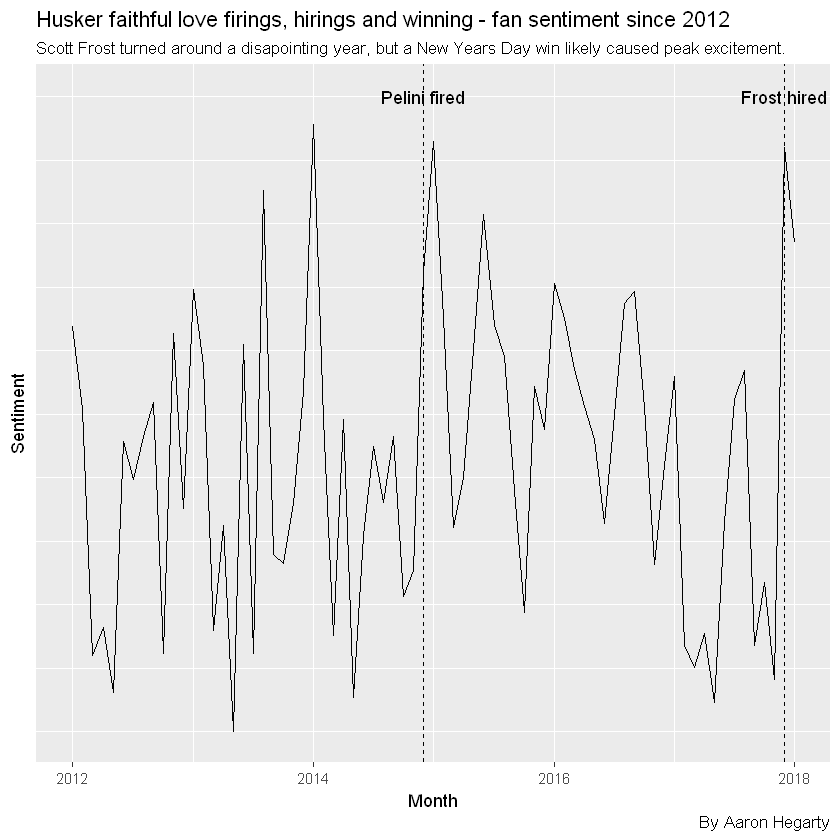

In [12]:
ggplot(yrmo_huskerMax, aes(x=yrmo, y=mean)) + geom_line() + theme(
        axis.text.y=element_blank(),
        axis.ticks.y=element_blank()) + labs(x="Month", y="Sentiment", title="Husker faithful love firings, hirings and winning - fan sentiment since 2012", subtitle="Scott Frost turned around a disapointing year, but a New Years Day win likely caused peak excitement.", caption="By Aaron Hegarty") + geom_vline(xintercept=as.numeric(yrmo_huskerMax$yrmo[36]), linetype=2) + annotate("text", x = as.numeric(yrmo_huskerMax$yrmo[36]), y=0.115, label = "Pelini fired")  + geom_vline(xintercept=as.numeric(yrmo_huskerMax$yrmo[72]), linetype=2)  + annotate("text", x = as.numeric(yrmo_huskerMax$yrmo[72]), y=0.115, label = "Frost hired") 

Nebraska defeated Georgia in the Gator Bowl on New Years Day 2014, causing the sentiment to rise to its highest point between 2012 and 2018. 

Frost didn't even match the sentiment of January 2015, when Nebraska was still reacting to the hiring of Mike Riley. This calls the accuracy of sentiment analysis into question. Perhaps HuskerMax subscribers spent a lot of time discussing the world-famous friendly personality of Mike Riley in January. Sentiment ratings in late 2014 were not as high as Frost's in late 2017.

2017

Excitement for Mike Riley's third season grew during the summer months, right until the opener against Arkansas State. Then reality struck.

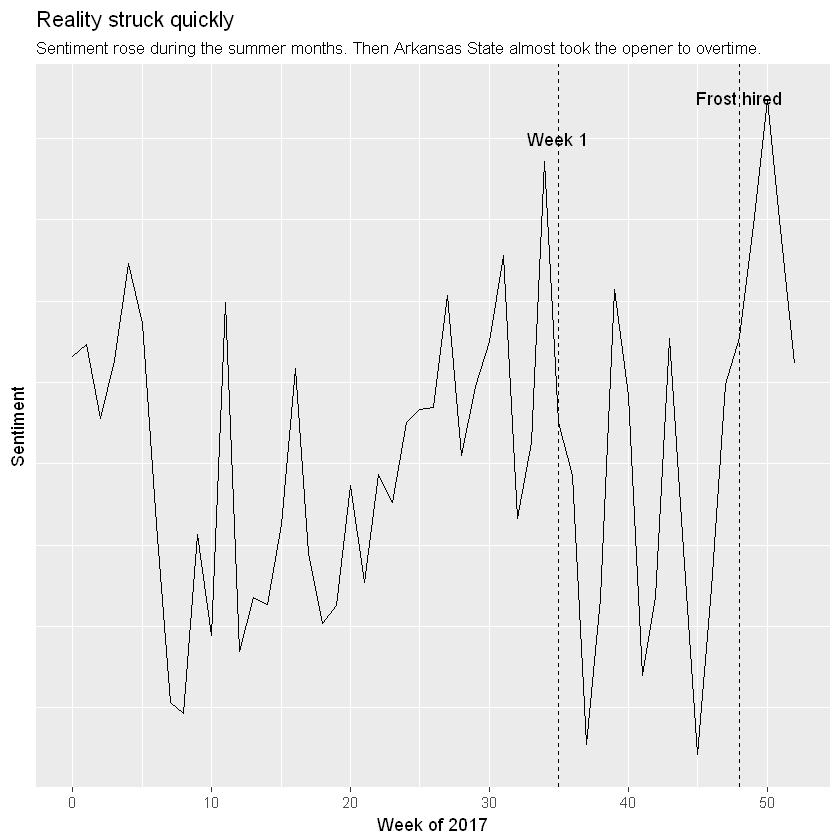

In [36]:
ggplot(week_huskerMax2017_mean, aes(x=as.numeric(week), y=mean)) + geom_line() + theme(
        axis.text.y=element_blank(),
        axis.ticks.y=element_blank()) + labs(x = "Week of 2017" ,y = "Sentiment", title = "Reality struck quickly", subtitle="Sentiment rose during the summer months. Then Arkansas State almost took the opener to overtime.") + geom_vline(xintercept=48, linetype=2)  + annotate("text", x = 48, y=0.125, label = "Frost hired") + geom_vline(xintercept=35, linetype=2)  + annotate("text", x = 35, y=0.12, label = "Week 1")

An even closer look shows the impending hiring of Frost outweighed the pain of losses to Penn State and Iowa.

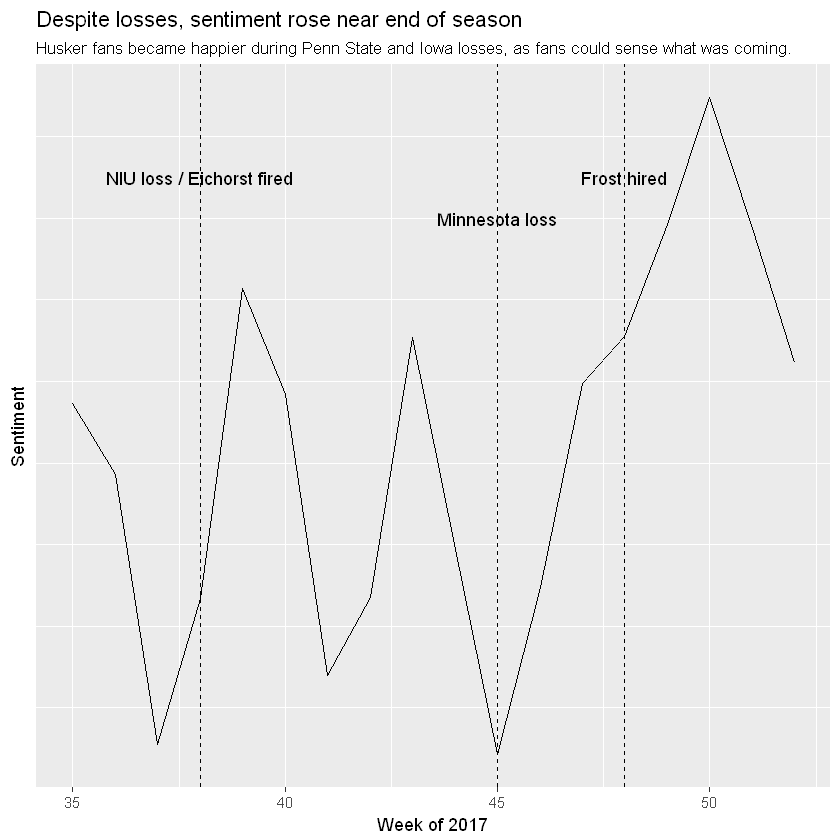

In [49]:
ggplot(week_huskerMax2017season_mean, aes(x=as.numeric(week), y=mean)) + geom_line() + theme(
        axis.text.y=element_blank(),
        axis.ticks.y=element_blank()) + labs(x = "Week of 2017" ,y = "Sentiment", title = "Despite losses, sentiment rose near end of season", subtitle = "Husker fans became happier during Penn State and Iowa losses, as fans could sense what was coming.")  + geom_vline(xintercept=38, linetype=2)  + annotate("text", x = 38, y=0.115, label = "NIU loss / Eichorst fired")  + geom_vline(xintercept=45, linetype=2)  + annotate("text", x = 45, y=0.11, label = "Minnesota loss") + geom_vline(xintercept=48, linetype=2)  + annotate("text", x = 48, y=0.115, label = "Frost hired")

Posts mentioning Frost have a highers sentiment rating.

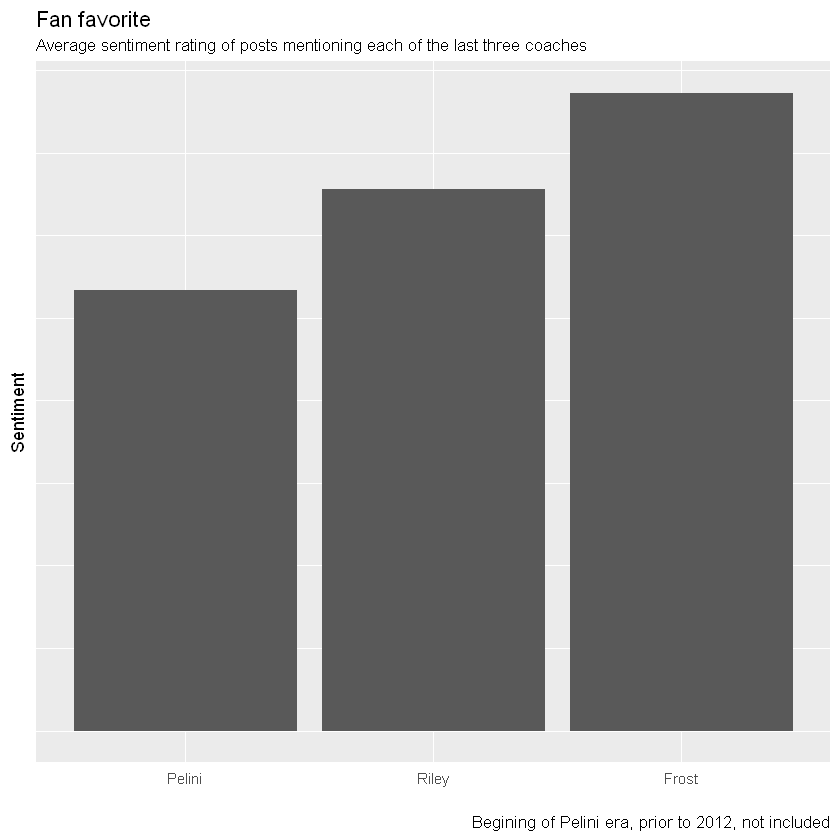

In [48]:
ggplot(coach_scores, aes(reorder(coach,coach_mean), weight=coach_mean)) + geom_bar() + theme(
        axis.text.y=element_blank(),
        axis.ticks.y=element_blank(),
        axis.ticks.x=element_blank())+ labs(y="Sentiment", x="", title="Fan favorite", subtitle = "Average sentiment rating of posts mentioning each of the last three coaches", caption="Begining of Pelini era, prior to 2012, not included")